## Introduction & Summery of Linear Regression.

- **Linear Regression**
- Regression means prediction dependent on the basis on independent variable.
- In the linear Regression the value should be continuous format.
- In that will use the Eucleadean distance to measure the error (eror is the perpandicular distance from the base fit line or Regression Line)
- It will minimized by using the StandarScaler or gradient indicent algorthm to find global minima there we will get the least eror or root mean squared error.
- **Kinds Of Regression.**
- There are two types of LinearRegression
- 1.Simple Regression
- 2.Mupliple regression i.e.Polynomial Regression.
- Both uses the linear relationship by using the straight line equation *y = mx+c*
- **Bias-Variance Trade Off**
- Bias:- It makes the prediction away from actual with low variance.
- Variance :- It is dispursion of the actual datapoint away from the mean of that datapoint.
- Bias and Variance are mutually invesly proportional to each other.
- If Bias get increase the Variance get decrease voice versa.
- whenver the bias is high and variace is low on that time model complexity got decreases but due to this reason model undefitted that it either proprly fit on model nor predict the actual of our data.
- Whenver the Bias get decrease and Variance get increse that time our model get confused due to inctrease in the model complexity and model become Overfitted .It means that model train on each and every datapoint of the datasets but failed to generlized the model either we say not predict in our favour.
- **Underfit and Overfit**
- Underfit - Whenevr the variance is low and bias is high that means it is Underfitted.
- Overfiited - Whenever the variance is high but the bias is low that time is Overfitted.fi
- **Identification Of Overfit & Underfit**
- Whenver the R2 score of training based fit model is greater than R2 score of testing based fit model that time we can say it is Ovefitted model or vice versa.
- **Errors**
- Mean Squared Error 
- Mean Absolute error
- **Measure of Performance Count Of the Linear Regression**
- R2score
- **Assumptions Of Linear Regression**
- 1.Linearity  - Graphical method regplot inbetween the residule and prediction.2nd Linear_rainbow method 3rd is the mean the residual is cloest to zero.
- 2.Normality  - Joque bera test (pvalue=5.99<Pjoquebera) and Graphical method by using the distribution plot of residual.Here null hypothesis is 5.99.
- 3.Homocidasticity - Graphical method lmplot inbetween the residul and prediction and Goldfread test or Bust wagon test.Here the pvalue of the null hypothesis is 0.05
- 4.No Autocorrelation- durbin-watson-test (0-2(possitive Auto-correlation) and 2 is no autocorrelation and 2 to 4 (Negetive Auto-correlation) and 
- 5.No Muticolinearity - Variance Influence factor.
- **Feature Selection Done On The Basis Of Highibe Correlation of the Independent with Dependedent Variable**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
data.rename(columns={'R&D Spend':'R&D','Marketing Spend':'Marketing'},inplace=True)

In [6]:
data.head()

,R&D,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D               50 non-null float64
Administration    50 non-null float64
Marketing         50 non-null float64
State             50 non-null object
Profit            50 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [8]:
data.describe()

,R&D,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data.isnull().sum()

R&D               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

### EDA

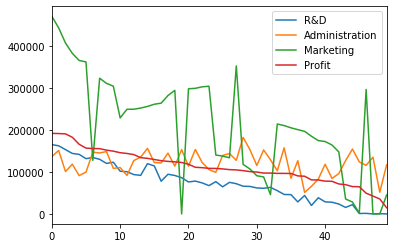

In [10]:
data.plot()
plt.show()

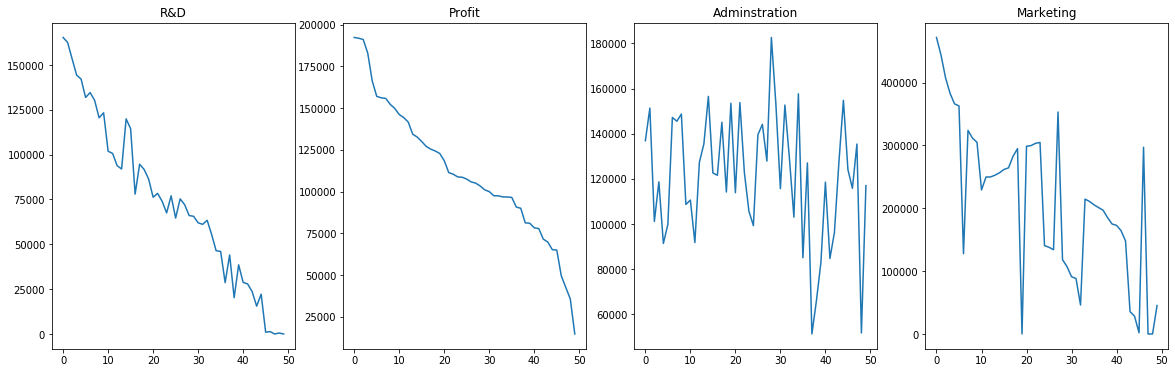

In [11]:
fig,[ax1,ax2,ax3,ax4]= plt.subplots(ncols=4,nrows=1,figsize=(20,6))

ax1.plot(data['R&D'])
ax1.set_title('R&D')
ax2.plot(data['Profit'])
ax2.set_title('Profit')
ax3.plot(data['Administration'])
ax3.set_title('Adminstration')
ax4.plot(data['Marketing'])
ax4.set_title('Marketing')
plt.show()

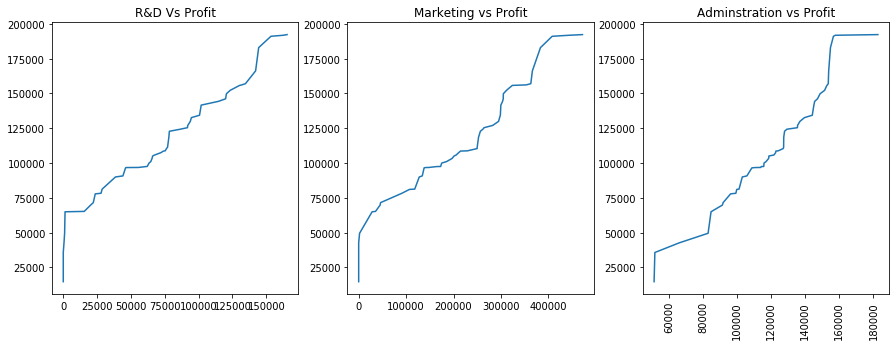

In [12]:
fig,[ax1,ax2,ax3]= plt.subplots(ncols=3,nrows=1,figsize=(15,5))

ax1.plot(data['R&D'].sort_values(ascending=False),data['Profit'].sort_values(ascending=False))
ax1.set_title('R&D Vs Profit')
plt.xticks(rotation=90)
ax2.plot(data['Marketing'].sort_values(ascending=False),data['Profit'].sort_values(ascending=False))
ax2.set_title('Marketing vs Profit')
plt.plot(rotation=90)
ax3.plot(data['Administration'].sort_values(ascending=False),data['Profit'].sort_values(ascending=False))
ax3.set_title('Adminstration vs Profit')
plt.xticks(rotation=90)
plt.show()

In [13]:
data['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

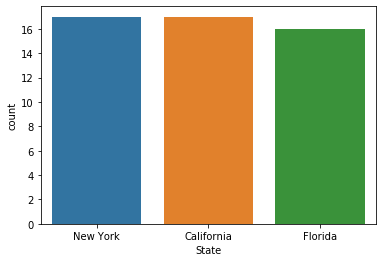

In [14]:
sns.countplot(data['State'])
plt.show()

In [15]:
data.groupby(data['State']).count()

,R&D,Administration,Marketing,Profit
State,,,,
California,17,17,17,17
Florida,16,16,16,16
New York,17,17,17,17


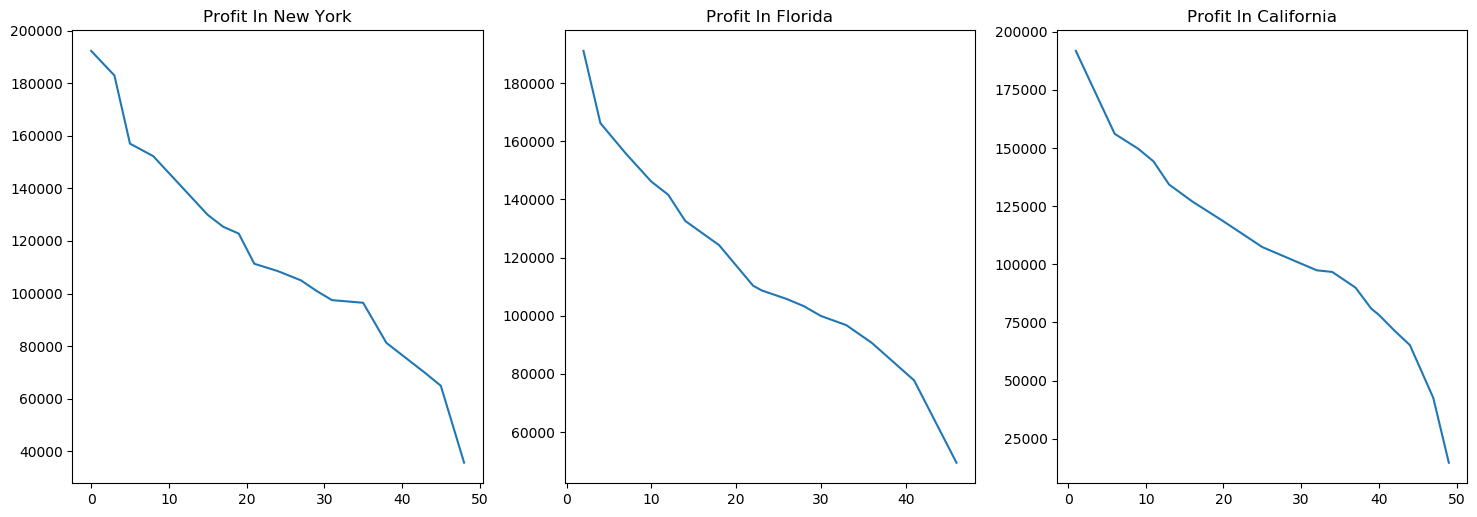

In [16]:
fig,[ax1,ax2,ax3] = plt.subplots(ncols=3,nrows=1,figsize=(18,6),dpi=100)
ax1.plot(data[data['State']=='New York']['Profit'])
ax1.set_title('Profit In New York')
ax2.plot(data[data['State']=='Florida']['Profit'])
ax2.set_title('Profit In Florida')
ax3.plot(data[data['State']=='California']['Profit'])
ax3.set_title('Profit In California')
plt.show()

In [17]:
data.columns

Index(['R&D', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

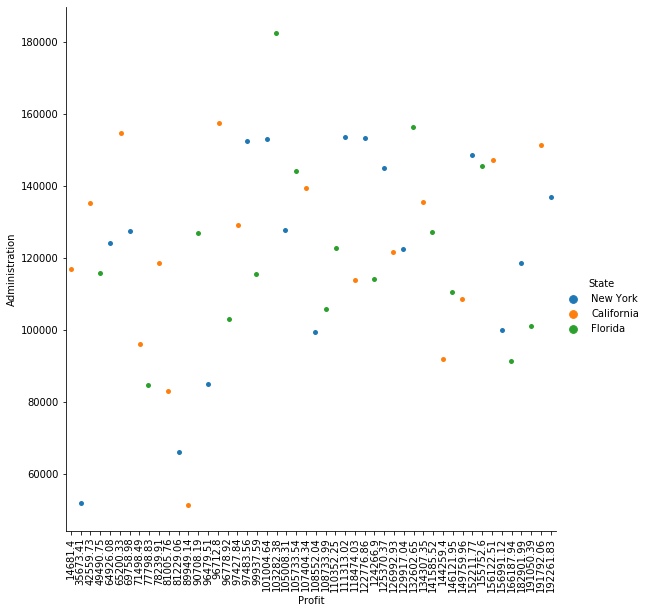

In [18]:
sns.catplot(y='Administration',x='Profit',data=data,hue='State',height=8)
plt.xticks(rotation=90)
plt.show()

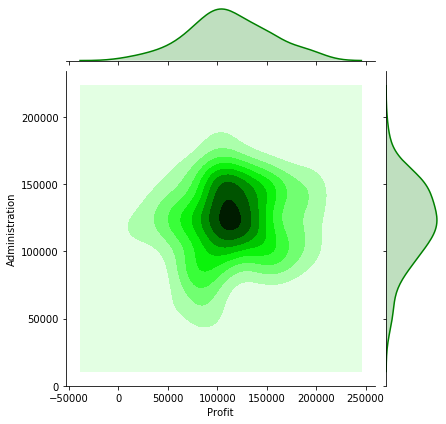

In [19]:
sns.jointplot(y='Administration',x='Profit',data=data,color='g',kind='kde')
plt.xticks(rotation=90)
plt.show()

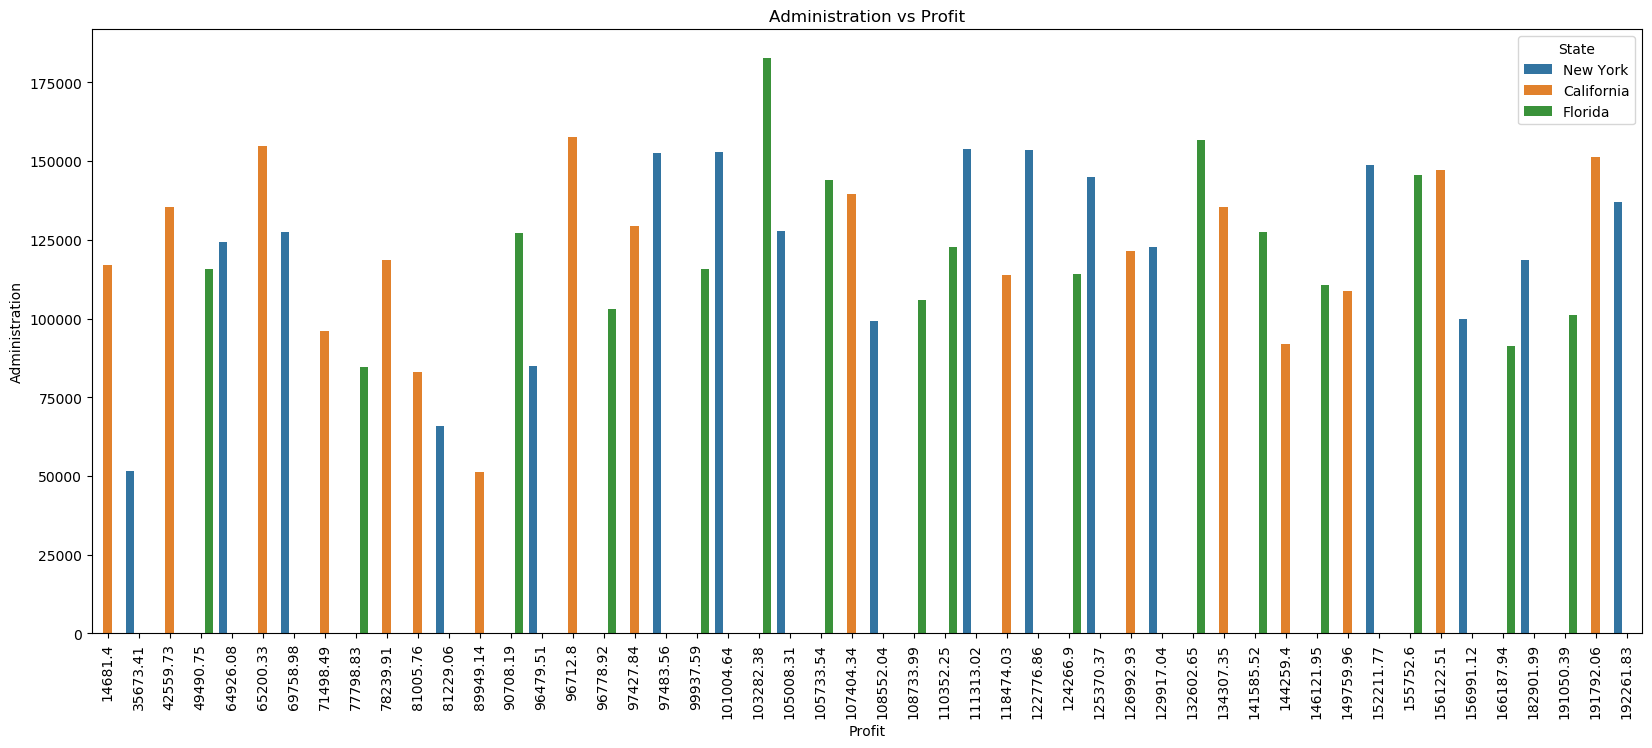

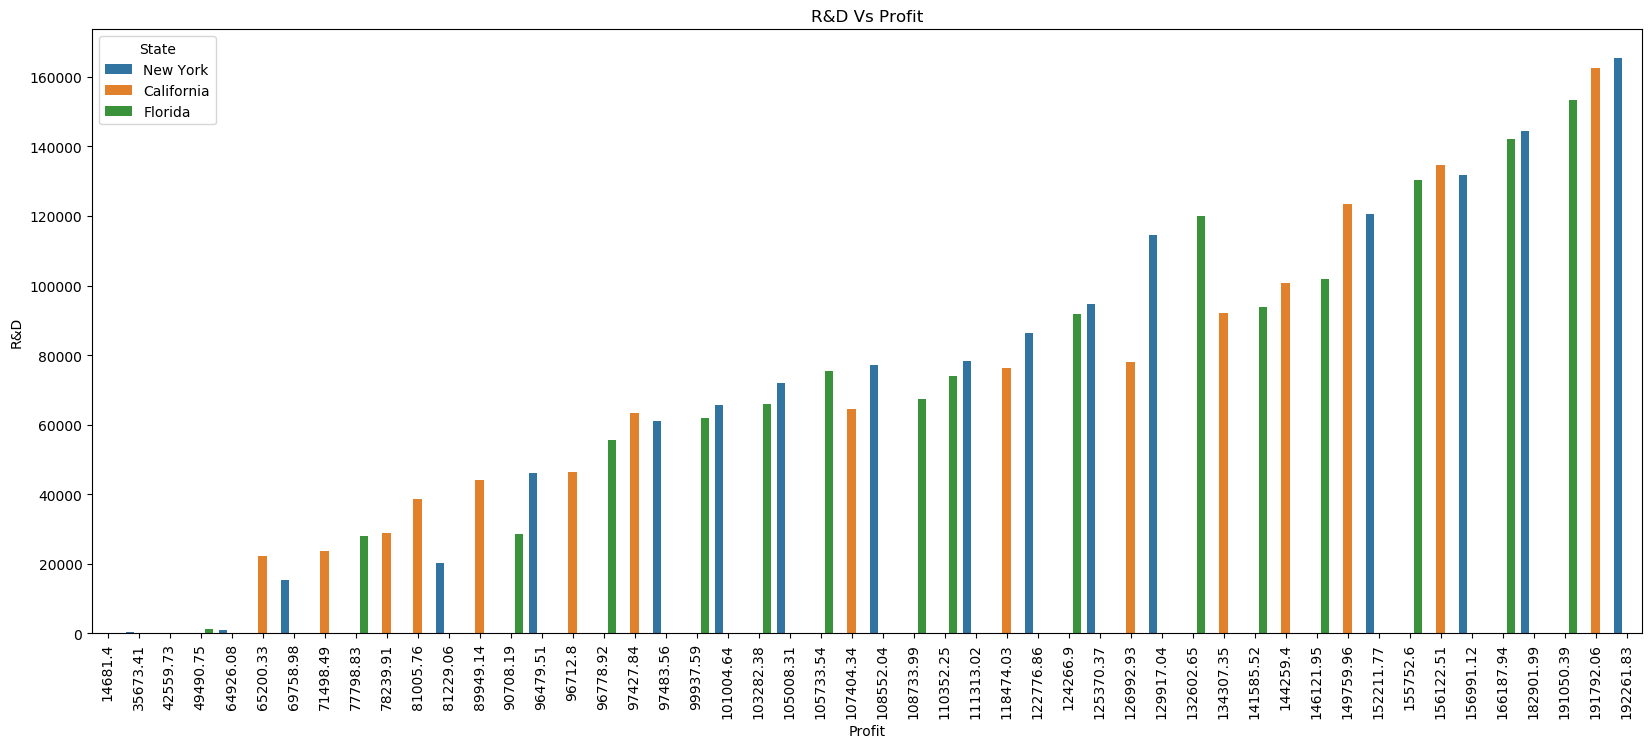

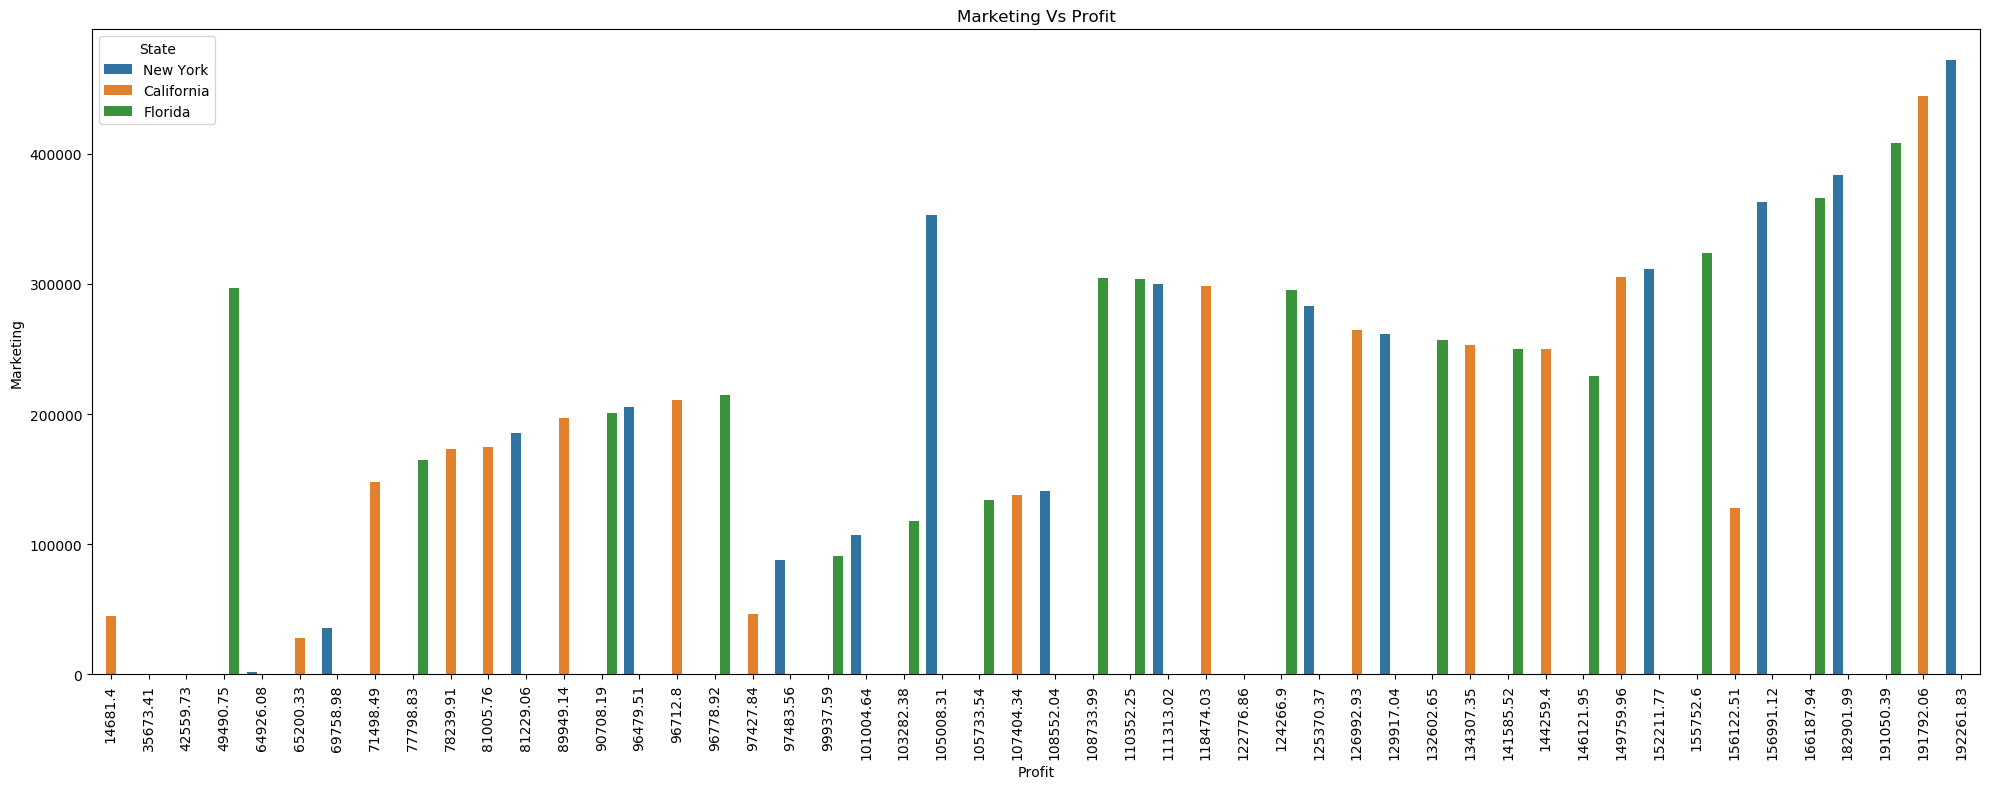

In [20]:
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(y='Administration',x='Profit',data=data,hue='State')
plt.title('Administration vs Profit')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(y='R&D',x='Profit',data=data,hue='State')
plt.title('R&D Vs Profit')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(y='Marketing',x='Profit',data=data,hue='State')
plt.title('Marketing Vs Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x576 with 0 Axes>

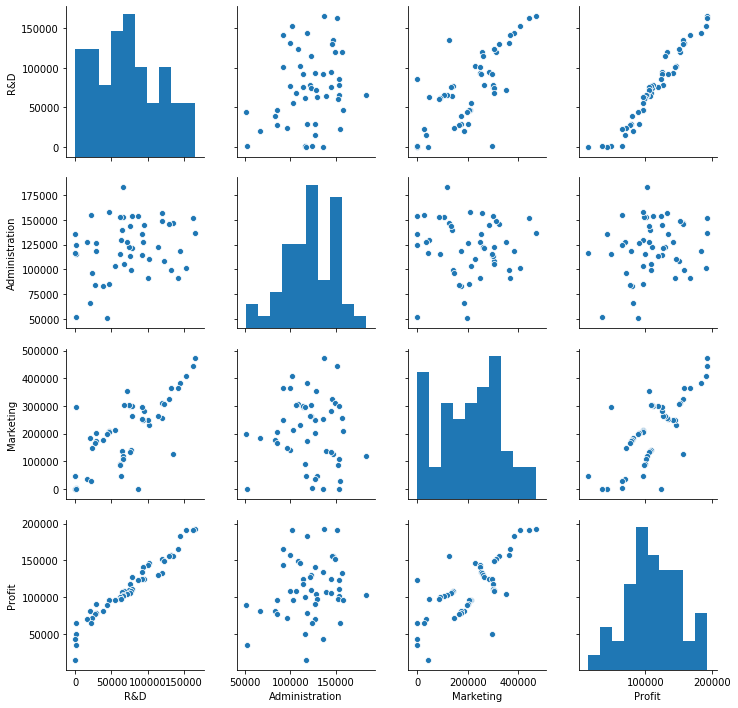

In [21]:
plt.figure(figsize=(15,8))
sns.pairplot(data)
plt.show()

In [22]:
df =pd.get_dummies(data['State'],drop_first=True)
dataframe = pd.concat([df,data],axis=1)
dataframe.drop(columns=['State'],inplace=True)
dataframe.head()

,Florida,New York,R&D,Administration,Marketing,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


## Start To Prepare Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error
from sklearn.preprocessing import StandardScaler

In [24]:
x=dataframe.drop(columns=['Profit'])
y=dataframe['Profit']

In [25]:
x = np.array(x)
y = np.array(y)

#### Train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42)

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
model= LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('R2 score :',r2_score(y_test,y_pred))

R2 score : 0.8987266414319837


In [29]:
print('Slop OF the Line :-',model.coef_)
print()
print('Y intersection of line :-',model.intercept_)

Slop OF the Line :- [ 4.47775725e+02  3.27289103e+00  3.81022693e+04 -1.86475430e+03
  3.38617581e+03]

Y intersection of line :- 115651.72050000001


In [30]:
print('Accuaracy over the training data :-',model.score(x_train,y_train))
print('Accuaracy over the training data :-',model.score(x_test,y_test))

Accuaracy over the training data :- 0.9537019995248526
Accuaracy over the training data :- 0.8987266414319837


In [31]:
from sklearn.model_selection import cross_val_score

In [38]:
val_score_mean = cross_val_score(model,x_train,y_train,cv=10).mean()
val_score_mean

0.9148232109588694

In [39]:
val_score_min = cross_val_score(model,x_train,y_train,cv=10).min()
val_score_min

0.7064528129403105

In [40]:
val_score_max = cross_val_score(model,x_train,y_train,cv=10).max()
val_score_max

0.9750119091746022

## Another way To tackle This Dataset.

In [41]:
dataframe.head()

,Florida,New York,R&D,Administration,Marketing,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


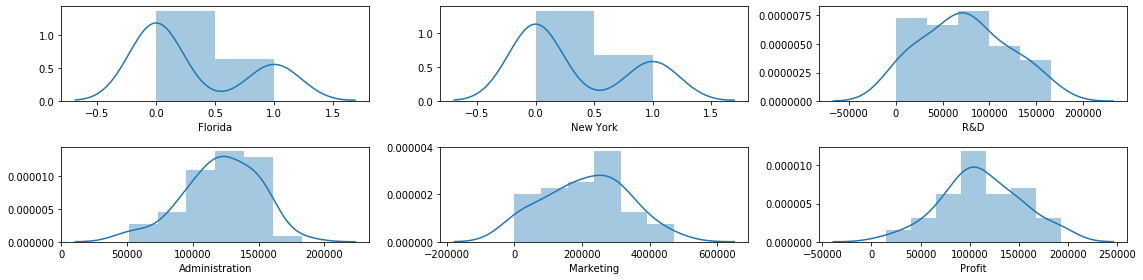

In [42]:
rows = 2
cols = 3 

fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col = dataframe.columns

index = 0 

for i in range(rows):
    for j in range(cols):
        sns.distplot(dataframe[col[index]],ax=ax[i][j])
        index =index+1  
plt.tight_layout()

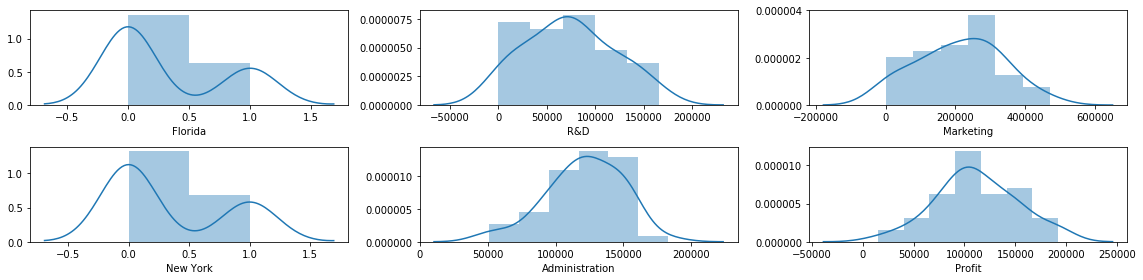

In [43]:
nrows = 2
cols =3 

fig,ax = plt.subplots(nrows=nrows,ncols=cols,figsize=(16,4))

col = dataframe.columns
index =0
for i in range(cols):
    for j in range(rows):
        sns.distplot(dataframe[col[index]],ax = ax[j][i])
        index = index +1
plt.tight_layout()

## Co-relation Of The Data

In [44]:
cormat =dataframe.corr()
cormat

,Florida,New York,R&D,Administration,Marketing,Profit
Florida,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New York,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


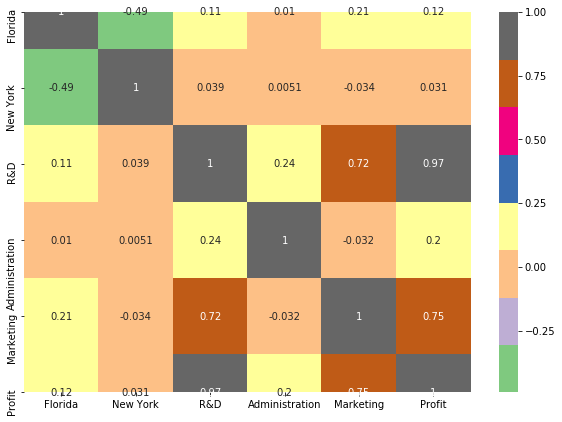

In [45]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(cormat,annot=True,annot_kws={'size':10},cmap='Accent')
plt.show()

In [46]:
cormat.index.values

array(['Florida', 'New York', 'R&D', 'Administration', 'Marketing',
       'Profit'], dtype=object)

### Check the skewness of the Target Variable and Outlier treatment

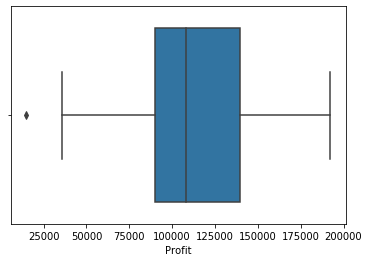

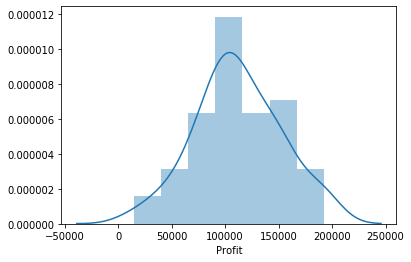

In [47]:
sns.boxplot(dataframe['Profit'])
plt.show()
sns.distplot(dataframe['Profit'])
plt.show()

## Z-Score

In [48]:
dataframe['Profit'].mean()

112012.63920000002

In [49]:
dataframe['Profit'].median()

107978.19

In [50]:
from scipy.stats import zscore

In [51]:
z = np.abs(zscore(dataframe['Profit']))

In [52]:
dataframe['z']=z

In [53]:
dataframe['z'].mean()

0.791398820354949

In [54]:
dataframe['z'].median()

0.649952180975987

In [55]:
dataz = dataframe[dataframe['z']<3]
dataz.head()

,Florida,New York,R&D,Administration,Marketing,Profit,z
0,0,1,165349.20,136897.80,471784.10,192261.83,2.011203
1,0,0,162597.70,151377.59,443898.53,191792.06,1.999430
2,1,0,153441.51,101145.55,407934.54,191050.39,1.980842
3,0,1,144372.41,118671.85,383199.62,182901.99,1.776627
4,1,0,142107.34,91391.77,366168.42,166187.94,1.357740


In [56]:
dataz.shape

(50, 7)

### IQR

In [57]:
Q1 = dataframe['Profit'].quantile(0.25)
Q3 = dataframe['Profit'].quantile(0.75)

IQR = Q3-Q1
IQR

49627.07499999998

In [58]:
dataiqr = dataframe[~((dataframe['Profit']<Q1-1.5*IQR)| (dataframe['Profit']>Q3+1.5*IQR))]
dataiqr.head()

,Florida,New York,R&D,Administration,Marketing,Profit,z
0,0,1,165349.20,136897.80,471784.10,192261.83,2.011203
1,0,0,162597.70,151377.59,443898.53,191792.06,1.999430
2,1,0,153441.51,101145.55,407934.54,191050.39,1.980842
3,0,1,144372.41,118671.85,383199.62,182901.99,1.776627
4,1,0,142107.34,91391.77,366168.42,166187.94,1.357740


In [59]:
dataiqr.shape

(49, 7)

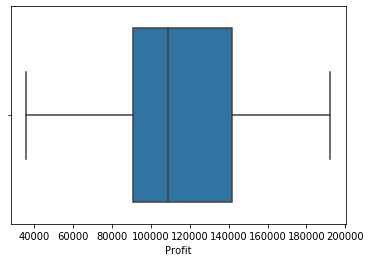

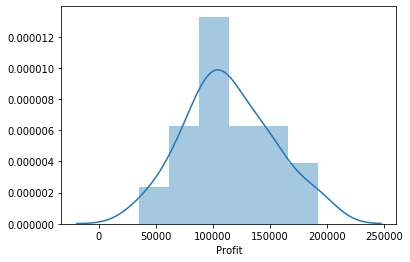

In [60]:
sns.boxplot(dataiqr['Profit'])
plt.show()
sns.distplot(dataiqr['Profit'])
plt.show()

## Feature Selection By Using Correlation Between the Independent and Depenedent Feature.

In [61]:
corr=dataframe.corr()['Profit']
corr

Florida           0.116244
New York          0.031368
R&D               0.972900
Administration    0.200717
Marketing         0.747766
Profit            1.000000
z                 0.047770
Name: Profit, dtype: float64

In [62]:
good_corr = corr[corr>0.5]
good_corr

R&D          0.972900
Marketing    0.747766
Profit       1.000000
Name: Profit, dtype: float64

In [63]:
index = good_corr.index

In [64]:
corrdata = dataframe[index]

In [65]:
corrdata.head()

,R&D,Marketing,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


<Figure size 1008x576 with 0 Axes>

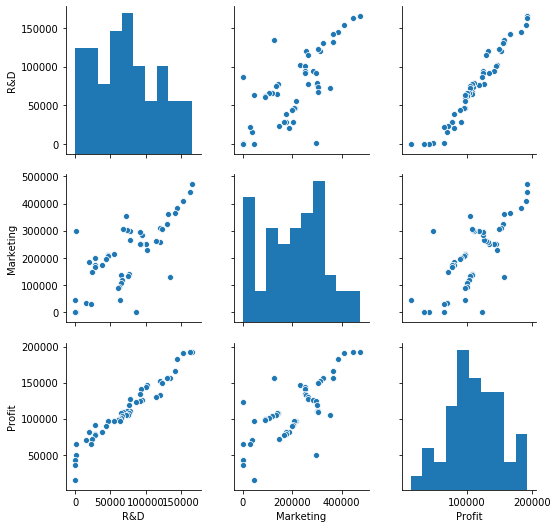

In [66]:
plt.figure(figsize=(14,8))
sns.pairplot(corrdata)
plt.show()

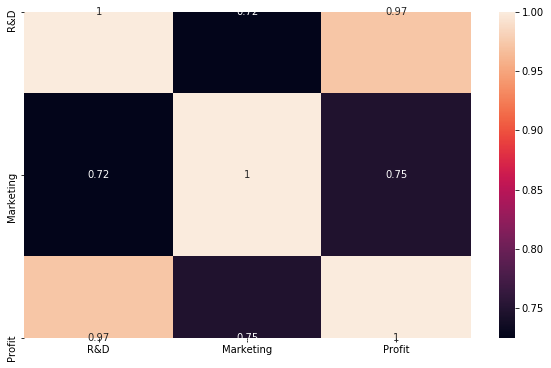

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(corrdata.corr(),annot=True)
plt.show()

### Create model

In [68]:
X = corrdata.drop(columns=['Profit'])
Y = corrdata['Profit']

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.80,random_state=42)

In [70]:
X_train.shape,Y_train.shape

((40, 2), (40,))

In [71]:
scaler =  StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### R2 score

R2 score is nothing but the **1-(mean Absolue Square).**
- If the r2 score is nearer to one then we can say the model is good
- If the r2 score is nearest to zero then we can say the model is not so much good.

### What Is R-Squared?

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

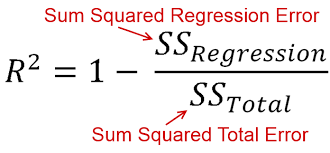

In [72]:
from IPython.display import Image
Image(filename='C:/Users/Microsoft/Desktop/pandas/download (2).png')

**Below we can see the**
- yi= Actal Point in data.
- ^y_pred = Predicted Y in the data
- -y_mean = Mean of the actual data.

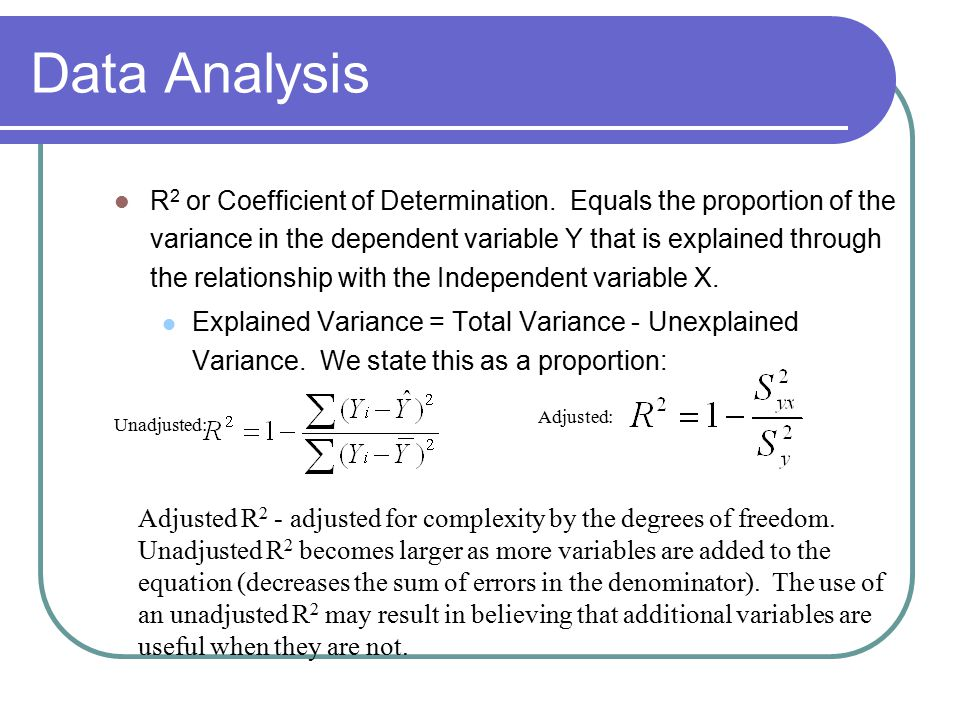

In [73]:
from IPython.display import Image
Image(filename='C:/Users/Microsoft/Desktop/pandas/Data+Analysis.jpg')

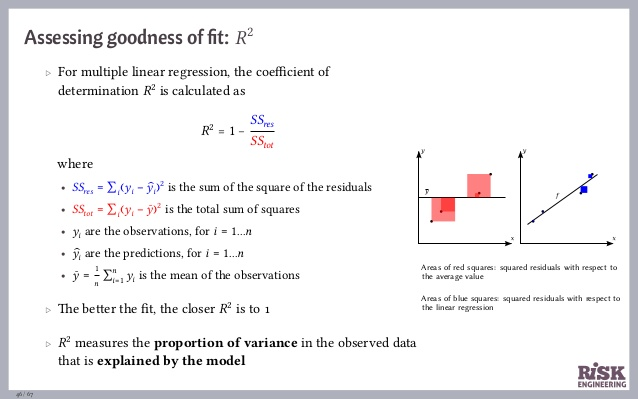

In [74]:
from IPython.display import Image
Image(filename='C:/Users/Microsoft/Desktop/pandas/regression-analysis-using-python-47-638.jpg')

In [75]:
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print('Accuarcy :',r2_score(Y_test,y_pred))

Accuarcy : 0.9168381183550247


In [76]:
dff = pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
dff

,Actual,Predicted
13,134307.35,127521.386041
39,81005.76,82615.074115
30,99937.59,97683.246234
45,64926.08,46400.656776
17,125370.37,130782.536119
48,35673.41,45967.020525
26,105733.54,109813.190619
25,107404.34,101612.689214
32,97427.84,97023.640139
19,122776.86,113241.365758


### Matrix Measures Of The Linear Regression.

- R2 score.
- Mean Absolute Error.(MAE)
- Mean Squared Error.(MSE)

In [77]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [78]:
score = r2_score(Y_test,y_pred)
mae =  mean_absolute_error(Y_test,y_pred)
mse =  mean_squared_error(Y_test,y_pred)

print('r2_score :',score)
print('Mean absolute error :',mae)
print('Mean squared Error :',mse)

r2_score : 0.9168381183550247
Mean absolute error : 6469.1817214685925
Mean squared Error : 67343832.5897961


In [79]:
MSE = np.sqrt(mse)
MSE

8206.328813165854

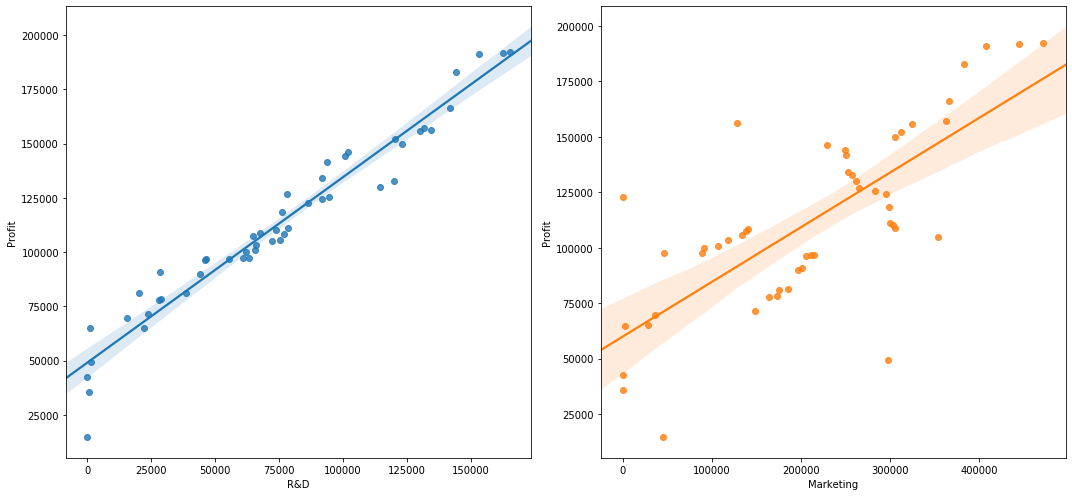

In [80]:
col = 2
row = 1
fig,ax = plt.subplots(nrows=row,ncols=col,figsize=(15,7))

cols = corrdata.columns
index=0
for i in range(rows):
        sns.regplot(x=corrdata[cols[index]],y=corrdata['Profit'],ax=ax[i])
        
        index = index+1
plt.tight_layout()

In [81]:
corrdata.columns

Index(['R&D', 'Marketing', 'Profit'], dtype='object')

## OLS Model

In [96]:
from statsmodels.api import add_constant

In [111]:
from statsmodels.api import OLS

In [115]:
x_constant = add_constant(X)

In [116]:
OLs_model = OLS(Y,x_constant).fit()

In [117]:
OLs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           2.16e-31
Time:                        00:16:10   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
residual=OLs_model.resid

In [126]:
prediction= OLs_model.predict(x_constant)

In [124]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

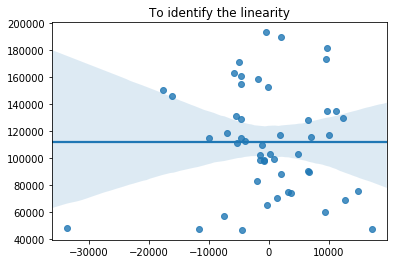

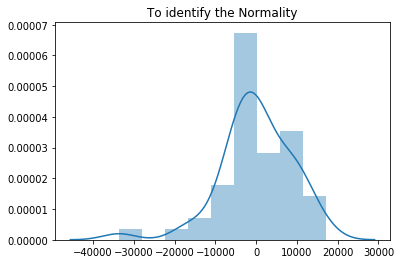

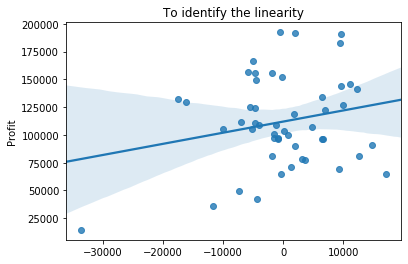

In [135]:
sns.regplot(OLs_model.resid,OLs_model.predict(x_constant))
plt.title('To identify the linearity')
plt.show()
sns.distplot(OLs_model.resid)
plt.title('To identify the Normality')
plt.show()
sns.regplot(OLs_model.resid,Y)
plt.title('To identify the linearity')
plt.show()

## To indentify the autocorrelation

In [136]:
import statsmodels.tsa.api as tsa

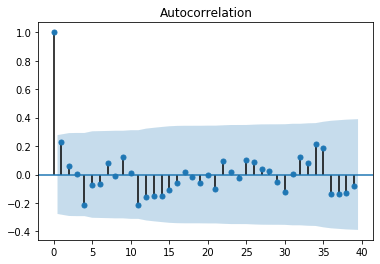

In [139]:
acf = tsa.graphics.plot_acf(OLs_model.resid,lags=range(40))

- 0 To 20 is possitive correlation.20 is no correlation and 20 to 40 is Negetive Correlation.

**Colinearity**

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
vif = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]

In [146]:
vif

[4.31092413950283, 2.1032058162760427, 2.1032058162760423]

In [147]:
dataframe=pd.DataFrame(vif,columns=['vif'],index=x_constant.columns)
dataframe

,vif
const,4.310924
R&D,2.103206
Marketing,2.103206
